In [1030]:
import pandas as pd
import spacy
from spacy.tokens import DocBin

In [1031]:
df = pd.read_csv('hellowork_raw.csv')
df

,description,domain
0,Data Qualiticien - Data Qualiticienne H/F <h2>...,Data
1,Data Contrôleur H/F <h2>Les missions du poste<...,Data
2,Manager Data H/F <h2>Les missions du poste</h2...,Data
3,Manager Data H/F <h2>Les missions du poste</h2...,Data
4,Manager Data H/F <h2>Les missions du poste</h2...,Data
...,...,...
5363,Champagne Hospitality & Retail Delivery Manage...,Hospitality and Tourism
5364,Hospitality Manager H/F <h2>Détail du poste</h...,Hospitality and Tourism
5365,Assistant Hospitality Manager H/F <h2>Les miss...,Hospitality and Tourism
5366,Stage - Assistant Hospitality Management - Mod...,Hospitality and Tourism


In [1032]:
df['description'] = df['description'].str.replace('<[^<]+?>', ' ', regex=True)

In [1033]:
print(df["description"][0])

Data Qualiticien - Data Qualiticienne H/F  Détail du poste  Contexte : L'Ingénierie nucléaire d'EDF (DIPNN) est engagée dans un programme de transformation d'ampleur destiné à renforcer sa maîtrise industrielle et sa compétitivité dans un contexte de croissance d'activité. Il repose à la fois sur des démarches de standardisation des référentiels, des processus et des produits, ainsi que sur un ambitieux programme de transformation numérique, visant une véritable ingénierie numérique et des pratiques Data Centric. Dans ce contexte, la DIPNN développe une démarche d'amélioration continue des données, en cohérence avec les orientations du Groupe EDF en matière de Qualité des données. Aussi, le Pôle DATA de la Direction des Systèmes d'Information (DSI) de la DIPNN recherche un Data Qualiticien. Positionnement et activités : Le Data Qualiticien est rattaché au Chief Data Officer (CDO) de la DIPNN et positionné au sein du Pôle DATA de la DSI. Il est responsable de la définition, de la mise e

In [1034]:
df['description'] = df['description'].str.replace(' +', ' ', regex=True)

In [1035]:
print(df["description"][0])

Data Qualiticien - Data Qualiticienne H/F Détail du poste Contexte : L'Ingénierie nucléaire d'EDF (DIPNN) est engagée dans un programme de transformation d'ampleur destiné à renforcer sa maîtrise industrielle et sa compétitivité dans un contexte de croissance d'activité. Il repose à la fois sur des démarches de standardisation des référentiels, des processus et des produits, ainsi que sur un ambitieux programme de transformation numérique, visant une véritable ingénierie numérique et des pratiques Data Centric. Dans ce contexte, la DIPNN développe une démarche d'amélioration continue des données, en cohérence avec les orientations du Groupe EDF en matière de Qualité des données. Aussi, le Pôle DATA de la Direction des Systèmes d'Information (DSI) de la DIPNN recherche un Data Qualiticien. Positionnement et activités : Le Data Qualiticien est rattaché au Chief Data Officer (CDO) de la DIPNN et positionné au sein du Pôle DATA de la DSI. Il est responsable de la définition, de la mise en 

In [1036]:
df['description'] = df['description'].str.lower()

In [1037]:
print(df["description"][0])

data qualiticien - data qualiticienne h/f détail du poste contexte : l'ingénierie nucléaire d'edf (dipnn) est engagée dans un programme de transformation d'ampleur destiné à renforcer sa maîtrise industrielle et sa compétitivité dans un contexte de croissance d'activité. il repose à la fois sur des démarches de standardisation des référentiels, des processus et des produits, ainsi que sur un ambitieux programme de transformation numérique, visant une véritable ingénierie numérique et des pratiques data centric. dans ce contexte, la dipnn développe une démarche d'amélioration continue des données, en cohérence avec les orientations du groupe edf en matière de qualité des données. aussi, le pôle data de la direction des systèmes d'information (dsi) de la dipnn recherche un data qualiticien. positionnement et activités : le data qualiticien est rattaché au chief data officer (cdo) de la dipnn et positionné au sein du pôle data de la dsi. il est responsable de la définition, de la mise en 

In [1038]:
stop_words_1 = ["l'", "d'", "t'"]
stop_words_2 = ["l'un", "l'une", "d'un", "d'une", "c'est"]

In [1039]:
from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('french')

In [1040]:
to_drop = ['c', 'd', 'j', 'l', 'm', 'n', 's', 't']
for w in to_drop:
    stop_words_nltk.remove(w)

In [1041]:
stop_words_2 = stop_words_2 + stop_words_nltk
stop_words_2 = list(set(stop_words_2))

In [1042]:
def remove_fr_stopwords(text):
    for w in stop_words_1:
        if " " + w in text:
            text = text.replace(" " + w, " ")
        elif text.startswith(w + " "):
            text = text.replace(w + " ", "")
    for w in stop_words_2:
        if " " + w + " " in text:
            text = text.replace(" " + w + " ", " ")
        elif text.startswith(w + " "):
            text = text.replace(w + " ", "")
        elif text.endswith(" " + w):
            text = text.replace(" " + w, "")
    return text

In [1043]:
remove_fr_stopwords("ton l'ami")

'ami'

In [1044]:
remove_fr_stopwords("tu es ton l'ami")

'ami'

In [1045]:
df["description"] = df["description"].apply(remove_fr_stopwords)

In [1046]:
df["description"] = df["description"].str.strip()

In [1047]:
df["description"][0]

'data qualiticien - data qualiticienne h/f détail poste contexte : ingénierie nucléaire edf (dipnn) engagée programme transformation ampleur destiné renforcer maîtrise industrielle compétitivité contexte croissance activité. repose fois démarches standardisation référentiels, processus produits, ainsi ambitieux programme transformation numérique, visant véritable ingénierie numérique pratiques data centric. contexte, dipnn développe démarche amélioration continue données, cohérence orientations groupe edf matière qualité données. aussi, pôle data direction systèmes information (dsi) dipnn recherche data qualiticien. positionnement activités : data qualiticien rattaché chief data officer (cdo) dipnn positionné sein pôle data dsi. responsable définition, mise oeuvre animation transverse démarche amélioration continue données ingénierie nucléaire. travaille étroitement ensemble entités projets industriels, ainsi process owners nommés niveau transverse. plus particulièrement charge activit

In [1048]:
df["description"][50]

"chargé projets crm data h/f missions poste lancée 2014, nickel solution paiement offre possibilité ouvrir compte courant sans découvert, 5 minutes chez buraliste 20€/an. ouvert tous sans condition revenus, nickel a déjà permis plus 3 millions clients payer être payé autrement façon utile, simple bienveillante. plus 700 collaborateurs basés entre paris, nantes, madrid, bruxelles, lisbonne berlin, nickel accélère développement international ambition ouvrir 3 nouveaux pays européens ici 2024 ! rejoindre nickel : * opportunité intégrer équipe dynamique, enthousiaste motivée (entreprise certifiée happyindex®atwork 2022 top 5 classement !). * possibilité contribuer croissance fintech responsable tournée vers inclusion bancaire sociale. * locaux modernes pensés collaborateurs (espaces détente, cafétéria, salles formation...) quartiers vivants dynamiques. * accompagnement nouveaux arrivants : formations, vis-ma-vie matinées promotions. rejoindrez équipe hervé, lead crm, constituée 2 personnes

In [1049]:
df["description"][700]

'ingénieur développement logiciel embarqué h/f détail poste description équipe equipe bsp responsable fourniture os bootloader utilises produits rgw societe. description mission generation of manufacturing software configuration from hardware description sagemcom builds residential gateways, which are embedded systems running a linux-based operating system. the hardware is designed by sagemcom, while being based : - suppliers reference designs, - other sagemcom product designs. the linux-based software that runs this hardware shall be able to exercise every interface (network, iot, gpios, leds...). to do that, it must be carefully configured and it is up to the bsp engineer to find out the most suitable configuration, based the hardware description provided by the hardware team. the hardware team works with tools for hardware designs (such mentor graphics) that include all the details of the design. this hardware description is perfectly understandable for hardware engineers, but it ma

In [1050]:
df["description"][930]

"sr experience designer 3d&i substance h/f missions poste our company changing the world through digital experiences is what adobe's all about. we give everyone-from emerging artists to global brands-everything they need to design and deliver exceptional digital experiences ! we're passionate about empowering people to create beautiful and powerful images, videos, and apps, and transform how companies interact with customers across every screen. we're a mission to hire the very best and are committed to creating exceptional employee experiences where everyone is respected and has access to equal opportunity. we realize that new ideas can come from everywhere in the organization, and we know the next big idea could be yours ! the opportunity from the moment you wake up in the morning until you go to bed at night consider the media you consume, the adverts you see, the apps you use, the websites you browse and almost all of the shopping you do online throughout the day. chances are that 

In [1051]:
df["description"][2000]

'ingénieur développement processus projet avancé h/f missions poste valeo entreprise mondiale haute technologie conçoit solutions révolutionnaires réinventer mobilité. équipementier partenaire constructeurs automobiles acteurs nouvelle mobilité monde entier. vision ? inventer mobilité plus verte plus sûre, grâce solutions axées conduite intuitive réduction émissions co2. leaders domaines activité reconnus comme plus grandes entreprises innovantes monde. prêt(e) relever défis voiture demain, faire partie acteurs mobilité électrique innovante ? rejoignez révolution technologique électrification automobile e-mobilité chez valeo ! plus 110 300 employés ca 16, 4 milliards €, fiers être leader marché équipementiers automobiles depuis siècle. centre r&d cergy rattaché business group powertrain systems. cette entité développe solutions innovantes réduire consommation carburant, émissions co2 polluants, sans compromis confort performances conduite. sein site, recherchons ingénieur développement

In [1052]:
df["description"][3500]

"secrétaire comptable h/f missions poste centre e.leclerc metz marly (57155 / moselle) emploie 500 salariés métiers alimentaires non-alimentaires. a créé 1995 accueille chaque année plus 1 600 000 clients. 533 adhérents e.leclerc exploitant 726 magasins indépendants france, emploient 140.000 salariés. enseigne e.leclerc a réalisé chiffre affaires 41 milliards euros (hors carburant) 2021 leader distribution française part marché 22.5%. employeurs engagés, centres e.leclerc accueillent chaque année près 4.000 alternants (dont 2800 apprentis) 10.000 stagiaires concourir formation. s'investissent également côtés agefiph démarche volontariste intégration personnes situation handicap. faire partie enseigne e.leclerc, intégrer fédération entreprises dynamiques, croissance démarquent autant mode fonctionnement capacité innover bouleverser idées reçues. centre e.leclerc metz marly (57155 / moselle), recherche contrat durée indéterminée temps partiel : secretaire comptable h/f sein équipe 11 per

In [1053]:
df["description"][4500]

"chef projet si rh & finance h/f missions poste cabinet recrutement tech, mission externatic faciliter rencontre entre candidats entreprises. mettons réseau connaissance marché tech (étude salaires, tendances) disposition épauler toutes étapes recherche. moteur : accompagner long terme trouver opportunité cdi, correspond projet professionnel, surtout proposer accès privilégié opportunités cachées sein pépites (startup / éditeur / dsi / pme). chez nous, côté humain prime transparents actions : ici, chaque offre emploi correspond poste réel ! noé lambert, consultant recrutement sein externatic, propose aujourd'hui découvrir offre ci-dessous échanger ensemble : plutôt visio ? autour verre ? ravi accompagner présenter job plus détail ! entreprise équipe accompagnons leaders monde transport spécialisé comptant plus 3000 salariés. cette entreprise située non loin roche-sur-yon herbiers, essarts-en-bocage, continue développer france international, grâce bonne croissance organique acquisitions

In [1054]:
df["description"][5100]

'médecin coordonnateur h/f missions poste située toulouse (31) coeur quartier minimes, résidence nouvelle orléans, architecture moderne ainsi, dispose espaces balnéothérapie rééducation. accueille 82 résidents (dont 14 unité protégée) propose également 4 places accueil temporaire. cet établissement fait partie réseau domusvi, groupe majeur secteur accueil services personnes âgées. tant médecin coordonnateur(trice), directement rattaché(e) directeur(trice) établissement, mettez oeuvre projet général soins collaboration cadre infirmier accord projet établissement. participez processus admission résidents : visites préadmission, évaluation gérontologique entrée, construction projet personnalisé suivi tout long séjour. garant prévention, surveillance prise charge risques éventuels santé publique sein établissement. coordonnez interventions médicales paramédicales, participez actions formation équipe soignante assurez lien réseaux partenaires institutionnels. chez domusvi, autonome pratique

In [1055]:
df.domain.value_counts()

Software Development and Programming    578
Data                                    396
Education and Training                  303
Legal and Law                           293
Finance and Banking                     262
Logistics and Transportation            236
Healthcare and Medicine                 227
Agriculture and Food                    223
Telecommunications                      220
Consulting                              217
Graphic Design and Multimedia           217
Commerce                                212
Marketing                               210
Human Resources                         203
Administrative Support and Reception    201
Aerospace                               197
Computer Systems and Networks           178
Quality Assurance and Control           177
Accounting                              176
Electrical Engineering                  155
Production and Manufacturing            136
Mechanical Engineering                  125
Hospitality and Tourism         

<Axes: >

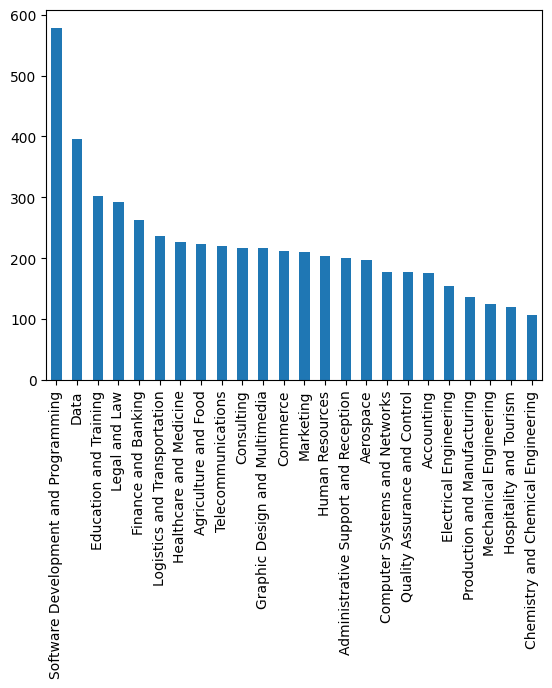

In [1056]:
df.domain.value_counts().plot(kind="bar")

In [1057]:
df = df.groupby("domain").head(100)

<Axes: >

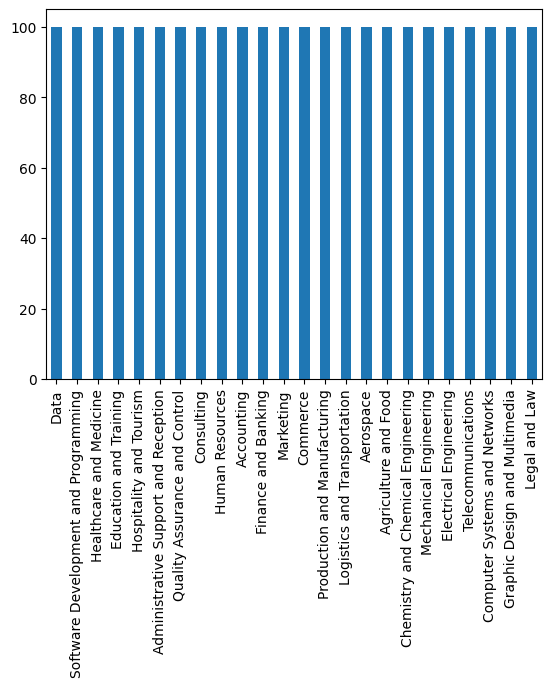

In [1058]:
df.domain.value_counts().plot(kind="bar")

In [1059]:
df

,description,domain
0,data qualiticien - data qualiticienne h/f déta...,Data
1,data contrôleur h/f missions poste baker tilly...,Data
2,manager data h/f missions poste manager data f...,Data
3,manager data h/f missions poste manager data f...,Data
4,manager data h/f missions poste business & dec...,Data
...,...,...
5343,réceptionniste h/f missions poste france hospi...,Hospitality and Tourism
5344,serveur saisonnier h/f détail poste hôtel : no...,Hospitality and Tourism
5345,plongeur extra h/f missions poste hôtel : rena...,Hospitality and Tourism
5346,réceptionniste h/f missions poste france hospi...,Hospitality and Tourism


In [1060]:
df = df.sample(frac=1).reset_index(drop=True)
df

,description,domain
0,infographiste h/f missions poste saica groupe ...,Graphic Design and Multimedia
1,health security & process safety manager batte...,Chemistry and Chemical Engineering
2,ingénieur devops data h/f missions poste group...,Data
3,event & marketing coordinator h/f missions pos...,Graphic Design and Multimedia
4,commercial pièces services 14 h/f missions pos...,Agriculture and Food
...,...,...
2395,chef projet supply chain finance h/f missions ...,Finance and Banking
2396,medecin h/f missions poste clic and work intér...,Healthcare and Medicine
2397,assistant approvisionnement h/f missions poste...,Administrative Support and Reception
2398,talan consulting - consultant si transports & ...,Consulting


In [1061]:
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

In [1064]:
# target format: [(text, {"cats": {"label1": True, "label2": False, ...}}), ...]
training_data = []
for index, row in train.iterrows():
    cats = {}
    for label in df["domain"].unique():
        if label == row["domain"]:
            cats[label] = True
        else:
            cats[label] = False
    training_data.append((row["description"], {"cats": cats}))

In [1065]:
dev_data = []
for index, row in test.iterrows():
    cats = {}
    for label in df["domain"].unique():
        if label == row["domain"]:
            cats[label] = True
        else:
            cats[label] = False
    dev_data.append((row["description"], {"cats": cats}))

In [1066]:
nlp = spacy.load("fr_core_news_lg")
nlp.add_pipe("textcat")
nlp.pipe_names

c:\Users\ychaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'fr_core_news_lg' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


['tok2vec',
 'morphologizer',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat']

In [1067]:
db = DocBin()
for text, annot in training_data:
    doc = nlp.make_doc(text)
    cats = annot["cats"]
    doc.cats = cats
    db.add(doc)
db.to_disk("./spacy/train.spacy")

In [1068]:
db = DocBin()
for text, annot in dev_data:
    doc = nlp.make_doc(text)
    cats = annot["cats"]
    doc.cats = cats
    db.add(doc)
db.to_disk("./spacy/dev.spacy")

In [1069]:
!python -m spacy init fill-config ./spacy/base_config.cfg ./spacy/config.cfg

✔ Auto-filled config with all values
✔ Saved config
spacy\config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


c:\Users\ychaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ychaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ychaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ychaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [ ]:
# python -m spacy train ./spacy/config.cfg --output ./spacy/output --paths.train ./spacy/train.spacy --paths.dev ./spacy/dev.spacy

In [1070]:
df.rename(columns={"domain": "label"}, inplace=True)
df.rename(columns={"description": "text"}, inplace=True)

In [1073]:
df["label"] = df["label"].apply(lambda x: x.replace(" ", "_"))

In [1074]:
df.to_csv("data_annotated.csv", index=False)

In [ ]:
# python -m prodigy textcat.manual job_domain_classif_frdata ./data_annotated.csv --label Computer_Systems_and_Networks,Data,Marketing,Mechanical_Engineering,Telecommunications,Legal_and_Law,Administrative_Support_and_Reception,Commerce,Chemistry_and_Chemical_Engineering,Hospitality_and_Tourism,Accounting,Human_Resources,Software_Development_and_Programming,Agriculture,Electrical_Engineering,Logistics_and_Transportation,Production_and_Manufacturing,Healthcare_and_Medicine,Education_and_Training,Finance_and_Banking,Consulting,Aerospace,Graphic_Design_and_Multimedia,Quality_Assurance_and_Control --exclusive